# Preamble

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [3]:
def bold(string):
    return "\033[1m" + string + "\033[0m"

# Select Dataset

In [4]:
from datasets import dataset_loader

In [5]:
name = 'heloc'
dropped_features = []#UCIDatasets().continuous_features[dataset]
dataset = dataset_loader(name, dropped_features=dropped_features, n_bins=None)

In [6]:
dataset.data

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,RiskPerformance
0,55.0,144.0,4,84,20,3,0,83,2.0,3,...,0.0,0,0,33.0,74.0,8.0,1.0,1.0,69.0,0
1,61.0,58.0,15,41,2,4,4,100,15.0,0,...,0.0,0,0,0.0,74.0,0.0,2.0,1.0,0.0,0
2,67.0,66.0,5,24,9,0,0,100,15.0,7,...,0.0,4,4,53.0,66.0,4.0,2.0,1.0,86.0,0
3,66.0,169.0,1,73,28,1,1,93,76.0,6,...,0.0,5,4,72.0,83.0,6.0,4.0,3.0,91.0,0
4,81.0,333.0,27,132,12,0,0,100,15.0,7,...,0.0,1,1,51.0,89.0,3.0,1.0,0.0,80.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10454,73.0,131.0,5,57,21,0,0,95,80.0,6,...,7.0,0,0,26.0,74.0,5.0,2.0,0.0,100.0,1
10455,65.0,147.0,39,68,11,0,0,92,28.0,6,...,1.0,1,1,86.0,53.0,2.0,2.0,1.0,80.0,0
10456,74.0,129.0,6,64,18,1,1,100,15.0,6,...,3.0,4,4,6.0,74.0,5.0,2.0,0.0,56.0,0
10457,72.0,234.0,12,113,42,2,2,96,35.0,6,...,6.0,0,0,19.0,74.0,4.0,1.0,0.0,38.0,0


<strong> Do not normalise input data (GLOBE-CE will handle it) </strong>

<strong> Do not shuffle input data (ensures same train/test split and normalisation values) </strong>

In [7]:
x_train, y_train, x_test, y_test, x_means, x_std = dataset.get_split(normalise=False, shuffle=False,
                                                                     return_mean_std=True)
prop1s = round(np.average(y_train)*100, 2)
print(bold("Proportion of 1s in Training Data:") + " {}%".format(prop1s))

Proportion of 1s in Training Data: 47.19%


In [8]:
X = pd.DataFrame(x_train)
X.columns = dataset.features[:-1]
X_test = pd.DataFrame(x_test)
X_test.columns = dataset.features[:-1]
print(bold("Dataset:") + " {}\n".format(name.replace('_', ' ').title()))
X

Dataset: Heloc



,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,55.0,144.0,4.0,84.0,20.0,3.0,0.0,83.0,2.0,3.0,...,43.0,0.0,0.0,0.0,33.0,74.0,8.0,1.0,1.0,69.0
1,61.0,58.0,15.0,41.0,2.0,4.0,4.0,100.0,15.0,0.0,...,67.0,0.0,0.0,0.0,0.0,74.0,0.0,2.0,1.0,0.0
2,67.0,66.0,5.0,24.0,9.0,0.0,0.0,100.0,15.0,7.0,...,44.0,0.0,4.0,4.0,53.0,66.0,4.0,2.0,1.0,86.0
3,66.0,169.0,1.0,73.0,28.0,1.0,1.0,93.0,76.0,6.0,...,57.0,0.0,5.0,4.0,72.0,83.0,6.0,4.0,3.0,91.0
4,81.0,333.0,27.0,132.0,12.0,0.0,0.0,100.0,15.0,7.0,...,25.0,0.0,1.0,1.0,51.0,89.0,3.0,1.0,0.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7891,68.0,182.0,19.0,94.0,19.0,0.0,0.0,90.0,2.0,4.0,...,40.0,0.0,3.0,3.0,5.0,48.0,3.0,3.0,0.0,55.0
7892,57.0,107.0,3.0,53.0,25.0,1.0,1.0,96.0,15.0,6.0,...,54.0,0.0,7.0,7.0,89.0,36.0,5.0,3.0,2.0,82.0
7893,65.0,94.0,6.0,43.0,31.0,2.0,1.0,91.0,38.0,6.0,...,42.0,0.0,0.0,0.0,18.0,88.0,5.0,3.0,0.0,50.0
7894,75.0,293.0,9.0,143.0,9.0,0.0,0.0,89.0,11.0,4.0,...,22.0,0.0,0.0,0.0,59.0,78.0,3.0,1.0,1.0,57.0


# Select Model

In [9]:
from models import performance

In [12]:
B_name = 'dnn'  # 'lr' or 'dnn' or 'xgb'
if B_name == 'dnn':
    from models import dnn_normalisers as normalisers
elif B_name == 'lr':
    from models import lr_normalisers as normalisers
else:  # no xgb normalisation
    normalisers = {name: False}
with open('models/{}_{}.pkl'.format(name, B_name), 'rb') as f:
    B = pickle.load(f)
normalise = [x_means, x_stds] if normalisers[name] else None

In [13]:
print(bold("Dataset:") + " {}".format(name.replace('_', ' ').title()))
print(bold("Model:") + " {}\n".format(B_name.replace('_', ' ').upper()))
performance(B, x_train, x_test, y_train, y_test, normalise=normalise)

Dataset: Heloc
Model: DNN

Train Accuracy: 74.19%
Test Accuracy: 73.62%
Proportion of 1s Predicted (Train): 45.11%
Proportion of 1s Predicted (Test): 45.77%


# GLOBE-CE

### Initialise GLOBE-CE class object

In [14]:
from globe_ce import GLOBE_CE

In [15]:
# AReS initiated to determine bin widths for costs
from ares import AReS
ares = AReS(model=B, dataset=dataset, X=X, n_bins=10, normalise=normalise)  # 1MB
bin_widths = ares.bin_widths

In [16]:
# example of ordinal features usage
ordinal_features = ['Present-Employment'] if name == 'german_credit' else []
# initialise GLOBE_CE
globe_ce = GLOBE_CE(model=B, dataset=dataset, X=X, affected_subgroup=None,
                    dropped_features=[], ordinal_features=ordinal_features, delta_init='zeros',
                    normalise=normalise, bin_widths=bin_widths, monotonicity=None, p=1)

### **Algorithm 1, Line 1** - Sample random $\delta$ vectors (translations), select $n=1$

100%|██████████| 1000/1000 [00:01<00:00, 714.32it/s]


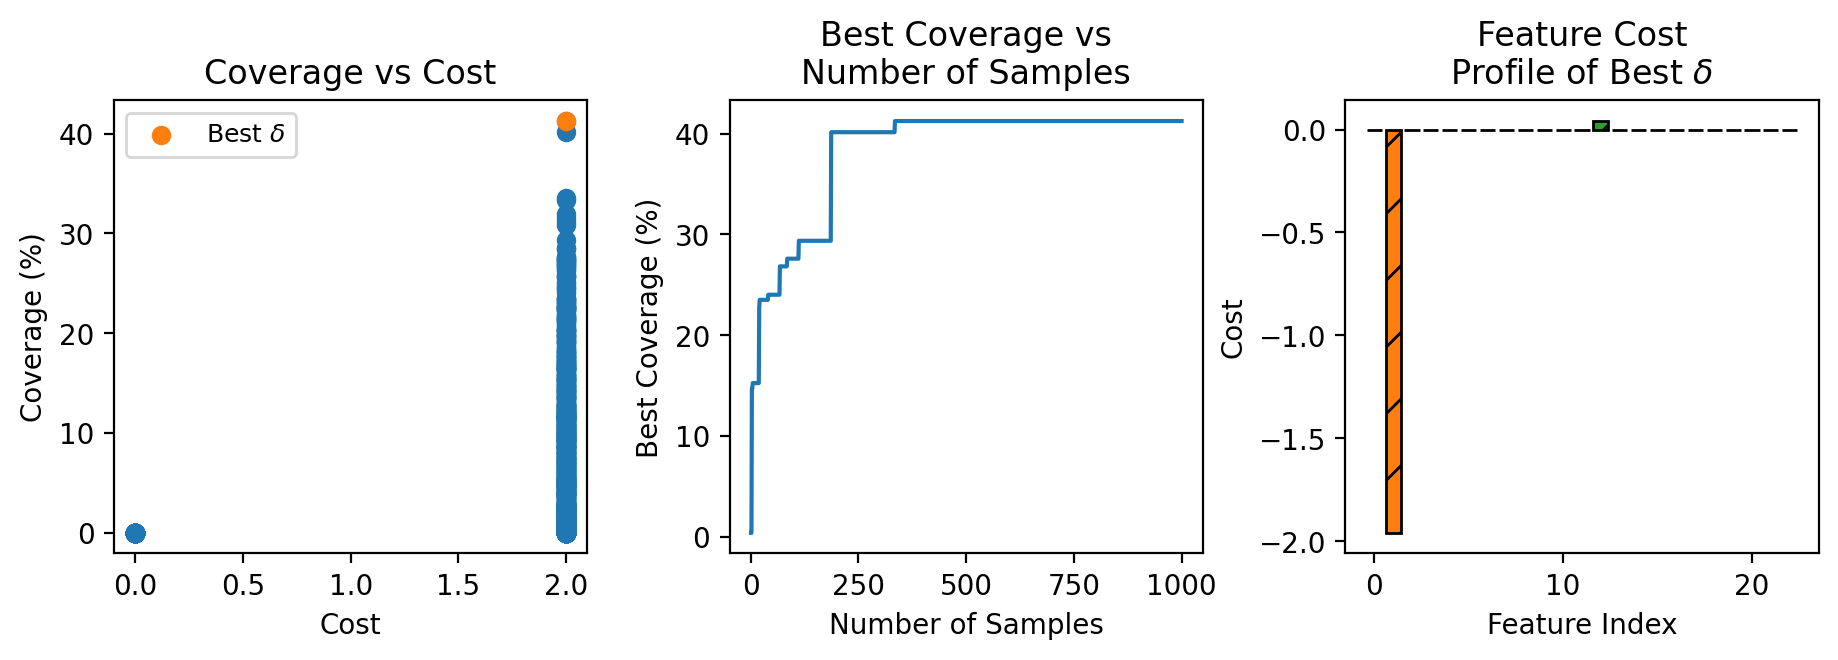

In [17]:
globe_ce.sample(n_sample=1000, magnitude=2, sparsity_power=1,  # magnitude is the fixed cost sampled at
                idxs=None, n_features=2, disable_tqdm=False,  # 2 random features chosen at each sample, no sparsity smoothing (p=1)
                plot=True, seed=0, scheme='random', dropped_features=[])
delta = globe_ce.best_delta  # pick best delta
globe_ce.select_n_deltas(n_div=3)

##### Plot the $n$ selected directions

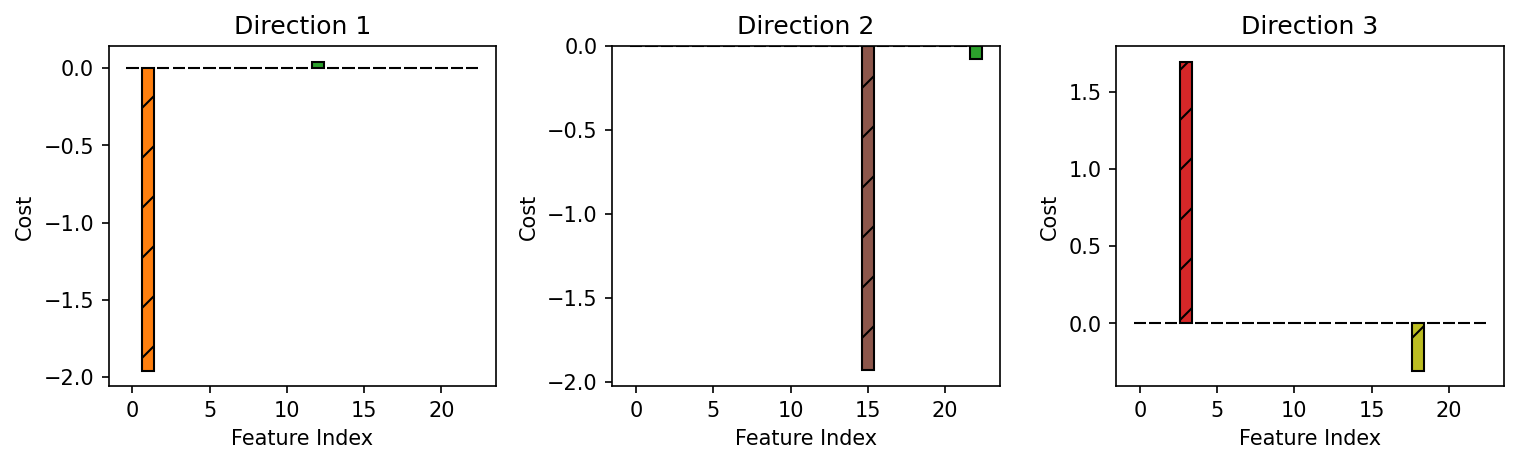

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=globe_ce.deltas_div.shape[0], dpi=150)
fig.set_figwidth(12)
fig.set_figheight(3)
plt.subplots_adjust(wspace=0.3)
for i in range(globe_ce.deltas_div.shape[0]):
    delta_cost = globe_ce.deltas_div[i] * globe_ce.feature_costs_vector
    cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    j, k = 0, 0
    for feature in globe_ce.features_tree:
        if not globe_ce.features_tree[feature]:
            ax[i].bar(range(j, j+1), delta_cost[j], hatch='/',
                        linewidth=1, edgecolor='black', color=cycle[k%len(cycle)])
            j += 1
            k += 1
        else:
            feature_values = globe_ce.features_tree[feature]
            n_f = len(feature_values)
            ax[2].bar(range(j, j+n_f), delta_cost[j:j+n_f], color=cycle[k%len(cycle)])
            j += n_f
            k += 1
    ax[i].set_title(f'Direction {i+1}')
    ax[i].set_xlabel('Feature Index')
    ax[i].set_ylabel('Cost')
plt.show()

### **Algorithm 1, Lines 3-6** - Scale best $\delta$ and Compute Minimum Costs/Scalars per Input

In [19]:
n_div = globe_ce.deltas_div.shape[0]
min_costs = np.zeros((n_div, globe_ce.x_aff.shape[0]))
min_costs_idxs = np.zeros((n_div, globe_ce.x_aff.shape[0]))
for i in range(n_div):  # Algorithm 1, Line 2
    cor_s, cos_s, k_s = globe_ce.scale(globe_ce.deltas_div[i], disable_tqdm=False, vector=True)  # Algorithm 1, Line 3
    min_costs[i], min_costs_idxs[i] = globe_ce.min_scalar_costs(cos_s, return_idxs=True, inf=True)  # Implicitly computes Algorithm 1, Lines 4-6, returning minimum costs per input and their indices in the k vector
    max_scalar_idxs = globe_ce.cluster_by_costs(cos_s, n_bins=5)
min_costs = min_costs.min(axis=0)

100%|██████████| 1000/1000 [00:01<00:00, 817.86it/s]


Unable to find recourse for 3/4334 inputs


100%|██████████| 1000/1000 [00:01<00:00, 800.10it/s]


Unable to find recourse for 4/4334 inputs


100%|██████████| 1000/1000 [00:01<00:00, 809.50it/s]

Unable to find recourse for 2317/4334 inputs


### Compute Best Average Costs given each Input uses its Minimum Scalar

In [21]:
costs_bound, corrects_bound = globe_ce.accuracy_cost_bounds(min_costs)

### Plot Coverage-Cost Profile and Minimum Costs Histogram

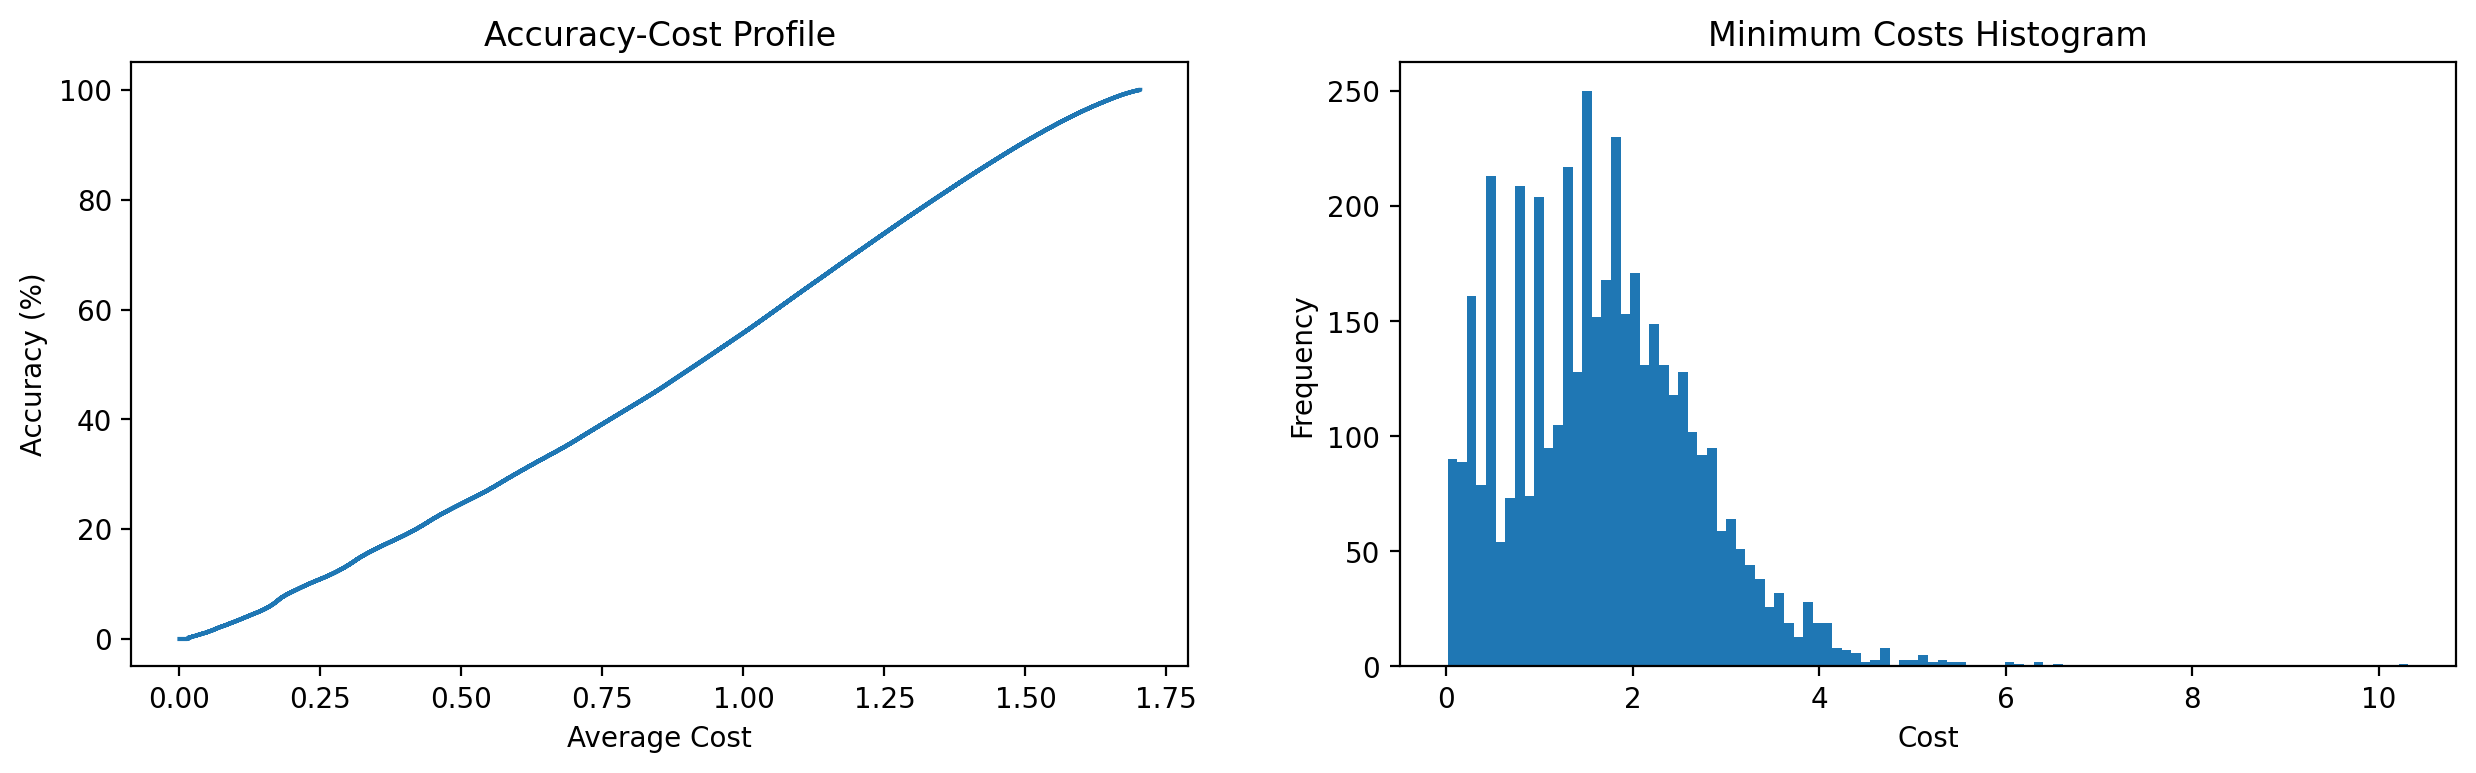

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, dpi=200)
fig.set_figwidth(15)
ax[0].step(costs_bound, corrects_bound, where='post')
ax[0].set_ylim([-5, 105])
ax[0].set_title('Accuracy-Cost Profile')
ax[0].set_xlabel('Average Cost')
ax[0].set_ylabel('Accuracy (%)')
ax[1].set_title('Minimum Costs Histogram')
ax[1].hist(min_costs, bins=100)
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Cost')
plt.show()

### Ablation Studies for $n=1$, fixed magnitude sampling

In [ ]:
# Default parameters
magnitude = 1  # 1.5 for DNN (HELOC), 1 for LR (HELOC)
n_s_default = 5000  # 10000 for DNN (HELOC), 5000 for LR (HELOC)
n_f_default = 23  # 23 continuous features in HELOC
p_default = 1  # p=1 has no effect on sparsity of direction vector

In [ ]:
print(f'Effect of n_f (n_s={n_s_default}, p={p_default})')
costs_bounds = []
corrects_bounds = []
n_fs = [1,2,4,8,12,23]
for n_f in n_fs:
    globe_ce.sample(n_sample=n_s_default, magnitude=magnitude, sparsity_power=p_default,  # magnitude is the fixed cost sampled at
                    idxs=None, n_features=n_f, disable_tqdm=True,
                    plot=False, seed=0, scheme='random', dropped_features=[])
    delta = globe_ce.best_delta
    corrects, costs, scalars = globe_ce.scale(delta=delta, vector=True, plot=True)
    min_costs = globe_ce.min_scalar_costs(costs=costs, return_idxs=False)
    costs_bound, corrects_bound = globe_ce.accuracy_cost_bounds(min_costs)
    costs_bounds.append(costs_bound)
    corrects_bounds.append(corrects_bound)

In [ ]:
print(f'Effect of n_s (n_f={n_f_default}, p={p_default})')
costs_bounds_ns = []
corrects_bounds_ns = []
n_samples = [25,50,200,500,1000,5000] # [100, 200, 500, 1000, 5000, 10000] # lr: 
for n_s in n_samples:
    globe_ce.sample(n_sample=n_s, magnitude=magnitude, sparsity_power=p_default,  # magnitude is the fixed cost sampled at
                    idxs=None, n_features=n_f_default, disable_tqdm=True,
                    plot=False, seed=0, scheme='random', dropped_features=[])
    delta = globe_ce.best_delta
    corrects, costs, scalars = globe_ce.scale(delta=delta, vector=True, plot=True)
    min_costs = globe_ce.min_scalar_costs(costs=costs, return_idxs=False)
    costs_bound, corrects_bound = globe_ce.accuracy_cost_bounds(min_costs)
    costs_bounds_ns.append(costs_bound)
    corrects_bounds_ns.append(corrects_bound)

In [ ]:
print(f'Effect of p (n_s={n_s_default}, n_f={n_f_default})')
costs_bounds_p = []
corrects_bounds_p = []
ps = [32, 16, 8, 4, 2, 1]
for p in ps:
    globe_ce.sample(n_sample=n_s_default, magnitude=magnitude, sparsity_power=p,  # magnitude is the fixed cost sampled at
                    idxs=None, n_features=n_f_default, disable_tqdm=True,
                    plot=False, seed=0, scheme='random', dropped_features=[])
    delta = globe_ce.best_delta
    corrects, costs, scalars = globe_ce.scale(delta=delta, vector=True, plot=True)
    min_costs = globe_ce.min_scalar_costs(costs=costs, return_idxs=False)
    costs_bound, corrects_bound = globe_ce.accuracy_cost_bounds(min_costs)
    costs_bounds_p.append(costs_bound)
    corrects_bounds_p.append(corrects_bound)

##### If model was Logistic Regression

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), dpi=100)

# n_f
for i, n_f in enumerate(n_fs):
    ax[0].plot(costs_bounds[i], corrects_bounds[i], label=r'$n_f$={}'.format(n_f))
ax[0].set_title(f'Effect of $n_f$ on Coverage-Cost Profile\n$(n_s={n_s_default}, p={p_default})$')

# n_s
for i, n_s in enumerate(n_samples):
    ax[1].plot(costs_bounds_ns[i], corrects_bounds_ns[i], label=r'$n_s$={}'.format(n_s))
ax[1].set_title(f'Effect of $n_s$ on Coverage-Cost Profile\n$(n_f={n_f_default}, p={p_default})$')

# p
for i, p in enumerate(ps):
    ax[2].plot(costs_bounds_p[i], corrects_bounds_p[i], label=r'$p$={}'.format(p))
ax[2].set_title(f'Effect of $p$ on Coverage-Cost Profile\n$(n_s={n_s_default}, n_f={n_f_default})$')


for i in range(3):
    ax[i].set_ylabel('Coverage (%)')
    ax[i].set_xlabel('Average Cost')
    ax[i].legend()

plt.suptitle(f'Logistic Regression, HELOC Dataset', fontweight='bold', fontsize=18, y=1.08)
plt.show()

##### If model was DNN

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), dpi=100)

# n_f
for i, n_f in enumerate(n_fs):
    ax[0].plot(costs_bounds[i], corrects_bounds[i], label=r'$n_f$={}'.format(n_f))
ax[0].set_title(f'Effect of $n_f$ on Coverage-Cost Profile\n$(n_s={n_s_default}, p={p_default})$')

# n_s
for i, n_s in enumerate(n_samples):
    ax[1].plot(costs_bounds_ns[i], corrects_bounds_ns[i], label=r'$n_s$={}'.format(n_s))
ax[1].set_title(f'Effect of $n_s$ on Coverage-Cost Profile\n$(n_f={n_f_default}, p={p_default})$')

# p
for i, p in enumerate(ps):
    ax[2].plot(costs_bounds_p[i], corrects_bounds_p[i], label=r'$p$={}'.format(p))
ax[2].set_title(f'Effect of $p$ on Coverage-Cost Profile\n$(n_s={n_s_default}, n_f={n_f_default})$')


for i in range(3):
    ax[i].set_ylabel('Coverage (%)')
    ax[i].set_xlabel('Average Cost')
    ax[i].legend()

plt.suptitle(f'Deep Neural Network, HELOC Dataset', fontweight='bold', fontsize=18, y=1.08)
plt.show()